In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm
import numpy as np

%matplotlib inline

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Weekly incidence curve with typical intensity and thresholds

In this example, we show the current year incidence up to given week.<br>
Along with the current incidence, we present the following intensity thresholds:<br>

* Low activity threshold: estimated epidemic threshold based on historical levels. Minimum: incidence equivalent to 5 cases.

* High activity threshold: incidence considered high based on historical levels. Minimum: incidence equivalent to 10 cases.

* Very high activity threshold: incidence considered very high based on historical levels. Minimum: incidence equivalent to 20 cases.

In [2]:
dfincidence = pd.read_csv('../data/clean_data_filtro_sintomas_dtsin4mem-incidence-2013.csv')
dftypical = pd.read_csv('../data/mem-typical-2016-uf.csv')
dfthresholds = pd.read_csv('../data/mem-report-2016-uf.csv')
dfpop = pd.read_csv('../data/populacao_uf_regional_atual.csv')

In [3]:
dfpop.head(10)

,Código,Unidade da Federação,População atual
0,11,Rondônia,1768204
1,12,Acre,803513
2,13,Amazonas,3938336
3,14,Roraima,505665
4,15,Pará,8175113
5,16,Amapá,766679
6,17,Tocantins,1515126
7,21,Maranhão,6904241
8,22,Piauí,3204028
9,23,Ceará,8904459


In [4]:
dfincidence.head(10)

,UF,isoweek,SRAG2013
0,11,1,0.000000
1,11,2,0.000000
2,11,3,0.000000
3,11,4,0.000000
4,11,5,0.000000
5,11,6,0.000000
6,11,7,0.000000
7,11,8,0.000000
8,11,9,0.173590
9,11,10,0.115726


In [5]:
dftypical.head(10)

,UF,População,isoweek,corredor baixo,corredor mediano,corredor alto,Unidade da Federação
0,11,1768204,1,0.000000,0.000000,0.000000,Rondônia
1,11,1768204,2,0.000000,0.000000,0.000000,Rondônia
2,11,1768204,3,0.000000,0.169664,0.169664,Rondônia
3,11,1768204,4,0.000000,0.056555,0.056555,Rondônia
4,11,1768204,5,0.000000,0.056555,0.056555,Rondônia
5,11,1768204,6,0.000000,0.056555,0.056555,Rondônia
6,11,1768204,7,0.028363,0.146713,0.758909,Rondônia
7,11,1768204,8,0.000000,0.062893,0.062893,Rondônia
8,11,1768204,9,0.000000,0.173590,0.173590,Rondônia
9,11,1768204,10,0.040106,0.080900,0.163189,Rondônia


In [6]:
dfthresholds.head(10)

,UF,População,Média geométrica do pico de infecção das temporadas regulares,limiar pré-epidêmico,intensidade alta,intensidade muito alta,se típica do início do surto,IC da se típica do início do surto,duração típica do surto,IC da duração típica do surto,Unidade da Federação
0,11,1768204,0.140678,0.282773,0.565546,1.131091,12,[4.0-39.0],2,[0.0-8.0],Rondônia
1,12,803513,0.941578,0.622267,1.244535,2.489070,15,[4.0-47.0],6,[3.0-9.0],Acre
2,13,3938336,0.128979,0.126957,0.253914,0.507829,7,[2.0-26.0],12,[12.0-12.0],Amazonas
3,14,505665,NaN,0.988797,1.977594,3.955188,NaN,NaN,NaN,NaN,Roraima
4,15,8175113,0.273137,0.090379,0.284216,0.501523,14,[10.0-18.0],10,[7.0-14.0],Pará
5,16,766679,NaN,0.652163,1.304327,2.608654,NaN,NaN,NaN,NaN,Amapá
6,17,1515126,0.186210,0.330006,0.660011,1.320022,21,[15.0-28.0],5,[1.0-14.0],Tocantins
7,21,6904241,NaN,0.072419,0.144839,0.289677,NaN,NaN,NaN,NaN,Maranhão
8,22,3204028,0.178607,0.156054,0.312107,0.624214,8,[4.0-16.0],8,[6.0-10.0],Piauí
9,23,8904459,0.109280,0.056152,0.115881,0.224607,7,[2.0-18.0],13,[11.0-15.0],Ceará


In [7]:
df = pd.merge(dfincidence, dftypical, on=['UF', 'isoweek']).merge(dfthresholds.drop(['Unidade da Federação', 'População'], axis=1), on='UF')
df.head(10)

,UF,isoweek,SRAG2013,População,corredor baixo,corredor mediano,corredor alto,Unidade da Federação,Média geométrica do pico de infecção das temporadas regulares,limiar pré-epidêmico,intensidade alta,intensidade muito alta,se típica do início do surto,IC da se típica do início do surto,duração típica do surto,IC da duração típica do surto
0,11,1,0.000000,1768204,0.000000,0.000000,0.000000,Rondônia,0.140678,0.282773,0.565546,1.131091,12,[4.0-39.0],2,[0.0-8.0]
1,11,2,0.000000,1768204,0.000000,0.000000,0.000000,Rondônia,0.140678,0.282773,0.565546,1.131091,12,[4.0-39.0],2,[0.0-8.0]
2,11,3,0.000000,1768204,0.000000,0.169664,0.169664,Rondônia,0.140678,0.282773,0.565546,1.131091,12,[4.0-39.0],2,[0.0-8.0]
3,11,4,0.000000,1768204,0.000000,0.056555,0.056555,Rondônia,0.140678,0.282773,0.565546,1.131091,12,[4.0-39.0],2,[0.0-8.0]
4,11,5,0.000000,1768204,0.000000,0.056555,0.056555,Rondônia,0.140678,0.282773,0.565546,1.131091,12,[4.0-39.0],2,[0.0-8.0]
5,11,6,0.000000,1768204,0.000000,0.056555,0.056555,Rondônia,0.140678,0.282773,0.565546,1.131091,12,[4.0-39.0],2,[0.0-8.0]
6,11,7,0.000000,1768204,0.028363,0.146713,0.758909,Rondônia,0.140678,0.282773,0.565546,1.131091,12,[4.0-39.0],2,[0.0-8.0]
7,11,8,0.000000,1768204,0.000000,0.062893,0.062893,Rondônia,0.140678,0.282773,0.565546,1.131091,12,[4.0-39.0],2,[0.0-8.0]
8,11,9,0.173590,1768204,0.000000,0.173590,0.173590,Rondônia,0.140678,0.282773,0.565546,1.131091,12,[4.0-39.0],2,[0.0-8.0]
9,11,10,0.115726,1768204,0.040106,0.080900,0.163189,Rondônia,0.140678,0.282773,0.565546,1.131091,12,[4.0-39.0],2,[0.0-8.0]


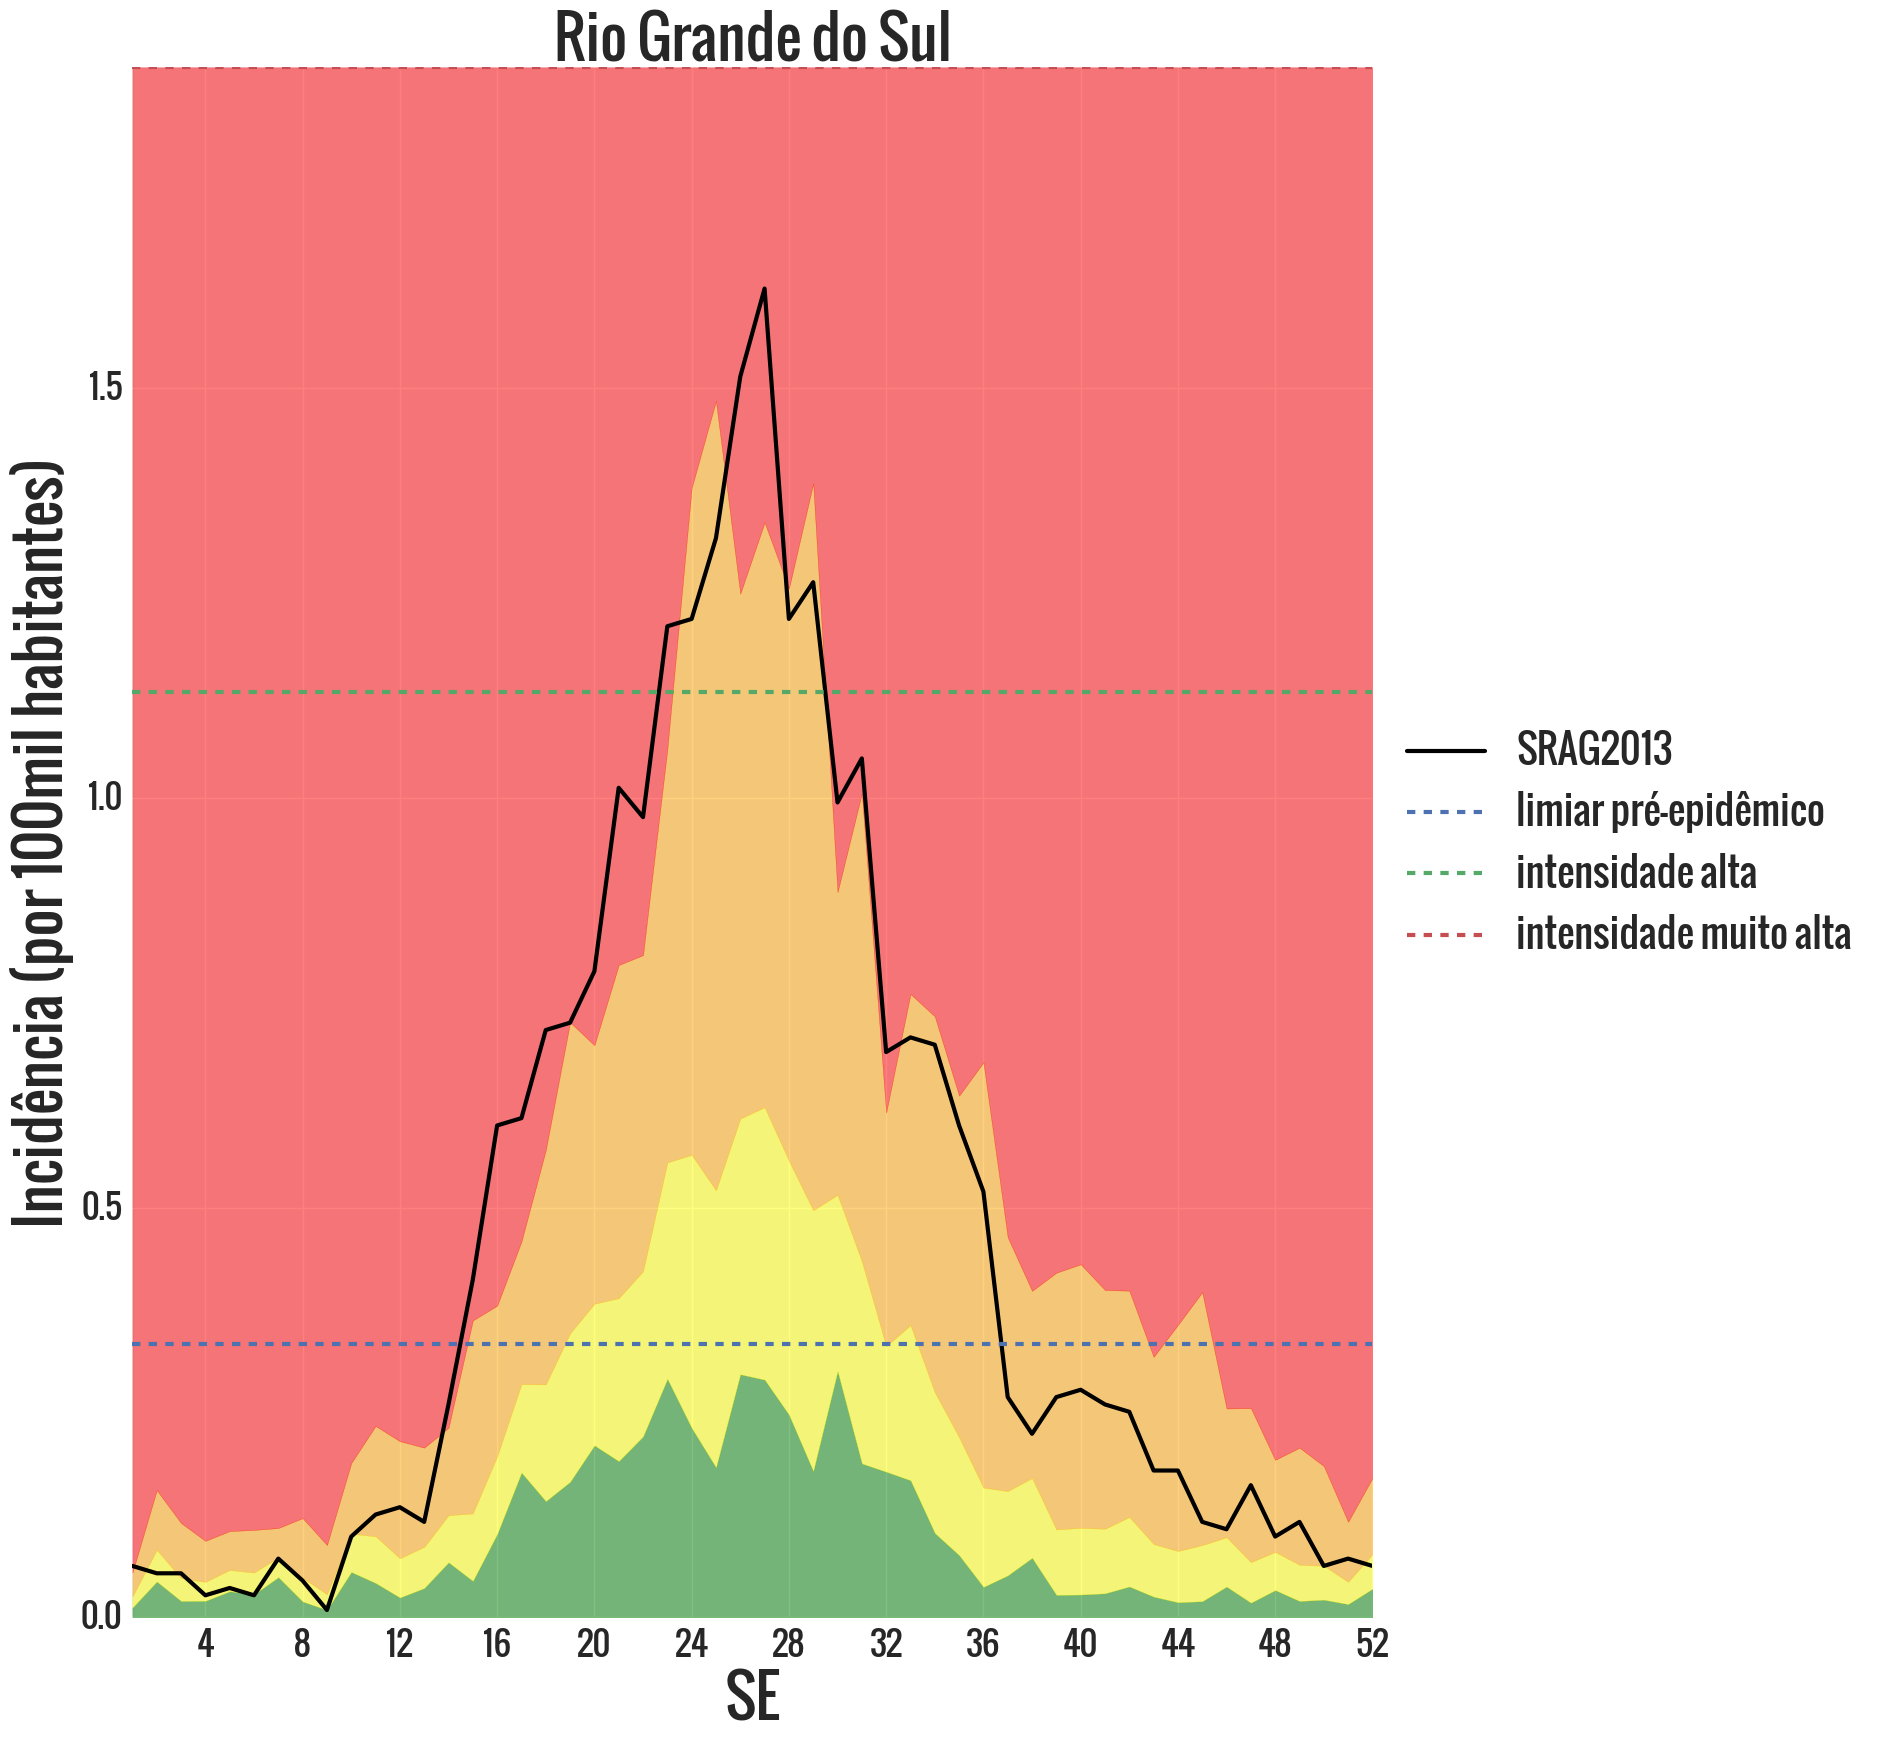

In [8]:
season = 'SRAG2013'
uf = 'Rio Grande do Sul'
dftmp = df[df['Unidade da Federação'] == uf]

fontproplgd = fm.FontProperties('Oswald')
fontproplgd.set_size(28)
fontproplbl = fm.FontProperties('Oswald')
fontproplbl.set_size(42)
fontpropticks = fm.FontProperties('Oswald')
fontpropticks.set_size(24)

fig, ax = plt.subplots(1, 1, figsize = [20, 20])

# Set ymax at least = 1:
maxval1 = dftmp[[season, 'corredor alto', 'intensidade muito alta']].max().max()
if maxval1 < 1:
    ax.set_ylim([0,1])
else:
    ax.set_ylim([0,maxval1])

ax.fill_between(dftmp['isoweek'], 0, dftmp['corredor baixo'], color='green', alpha=0.5)
ax.fill_between(dftmp['isoweek'], dftmp['corredor baixo'], dftmp['corredor mediano'], color='yellow', alpha=0.5)
ax.fill_between(dftmp['isoweek'], dftmp['corredor mediano'], dftmp['corredor alto'], color='orange', alpha=0.5)
dftmp.plot(ax=ax, x='isoweek', y=season, color='k', lw=3)
dftmp.plot(ax=ax, x='isoweek', y='limiar pré-epidêmico', style='--', lw=3)
dftmp.plot(ax=ax, x='isoweek', y='intensidade alta', style='--', lw=3)
dftmp.plot(ax=ax, x='isoweek', y='intensidade muito alta', style='--', lw=3)
dftmp.plot(ax=ax, x='isoweek', y='corredor alto', legend=False, alpha=0)
miny, maxy = ax.get_ylim()
del(ax.lines[-1])
ax.fill_between(dftmp['isoweek'], dftmp['corredor alto'], maxy, color='red', alpha=0.5)
ax.set_ylim([miny, maxy])


for label in ax.get_xticklabels() :
    label.set_fontproperties(fontpropticks)    
for label in ax.get_yticklabels() :
    label.set_fontproperties(fontpropticks)

ax.set_title(uf, fontproperties=fontproplbl)
ax.set_xlabel('SE', fontproperties=fontproplbl)
ax.set_ylabel('Incidência (por 100mil habitantes)', fontproperties=fontproplbl)
xticks = np.arange(4,53,4)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(prop=fontproplgd, loc='center left', bbox_to_anchor=(1,0.5))